In [44]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [45]:
# set disply option to see all columns
pd.set_option('display.max_columns', None)

#read data
data = pd.read_csv('incident_event_log.csv')
data.head(10)

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,cmdb_ci,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 21,29/2/2016 01:23,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 642,29/2/2016 08:53,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 804,29/2/2016 11:29,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 908,5/3/2016 12:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 746,29/2/2016 04:57,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
5,INC0000047,Active,True,1,0,1,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 21,29/2/2016 05:30,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,Group 24,Resolver 31,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
6,INC0000047,Active,True,1,0,2,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 21,29/2/2016 05:33,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,Group 24,Resolver 31,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
7,INC0000047,Active,True,1,0,3,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 804,29/2/2016 11:31,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,Group 24,Resolver 31,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
8,INC0000047,Active,True,1,0,4,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 703,29/2/2016 11:32,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,Group 24,Resolver 31,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
9,INC0000047,Active,True,1,0,5,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 332,1/3/2016 09:14,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,Group 24,Resolver 31,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


In [149]:
data.number.unique().shape

(24918,)

In [46]:
data.shape

(141712, 36)

**Data Description:**

    1. number: incident identifier (24,918 different values);
    2. incident state: eight levels controlling the incident management process transitions from
    opening until closing the case;
    3. active: Boolean attribute that shows whether the record is active or closed/cancelled;
    4. reassignment_count: number of times the incident has the group or the support analysts
    changed;
    5. reopen_count: number of times the incident resolution was rejected by the caller;
    6. sys_mod_count: number of incident updates until that moment;
    7. made_sla: boolean attribute that shows whether the incident exceeded the target SLA;
    8. caller_id: identifier of the user affected;
    9. opened_by: identifier of the user who reported the incident;
    10. opened_at: incident user opening date and time;
    11. sys_created_by: identifier of the user who registered the incident;
    12. sys_created_at: incident system creation date and time;
    13. sys_updated_by: identifier of the user who updated the incident and generated the
    current log record;
    14. sys_updated_at: incident system update date and time;
    15. contact_type: categorical attribute that shows by what means the incident was reported;
    16. location: identifier of the location of the place affected;
    17. category: first-level description of the affected service;
    18. subcategory: second-level description of the affected service (related to the first level
    description, i.e., to category);
    19. u_symptom: description of the user perception about service availability;
    20. cmdb_ci: (confirmation item) identifier used to report the affected item (not mandatory);
    21. impact: description of the impact caused by the incident (values: 1 - High; 2 - Medium; 3 -
    Low);
    22. urgency: description of the urgency informed by the user for the incident resolution
    (values: 1 - High; 2 - Medium; 3 - Low);
    23. priority: calculated by the system based on &#39;impact&#39; and &#39;urgency&#39;;
    24. assignment_group: identifier of the support group in charge of the incident;
    25. assigned_to: identifier of the user in charge of the incident;
    26. knowledge: boolean attribute that shows whether a knowledge base document was used
    to resolve the incident;
    27. u_priority_confirmation: boolean attribute that shows whether the priority field has been
    double-checked;
    28. notify: categorical attribute that shows whether notifications were generated for the
    incident;

    29. problem_id: identifier of the problem associated with the incident;
    30. rfc: (request for change) identifier of the change request associated with the incident;
    31. vendor: identifier of the vendor in charge of the incident;
    32. caused_by: identifier of the RFC responsible by the incident;
    33. close_code: identifier of the resolution of the incident;
    34. resolved_by: identifier of the user who resolved the incident;
    35. resolved_at: incident user resolution date and time (dependent variable);
    36. closed_at: incident user close date and time (dependent variable).

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
number                     141712 non-null object
incident_state             141712 non-null object
active                     141712 non-null bool
reassignment_count         141712 non-null int64
reopen_count               141712 non-null int64
sys_mod_count              141712 non-null int64
made_sla                   141712 non-null bool
caller_id                  141712 non-null object
opened_by                  141712 non-null object
opened_at                  141712 non-null object
sys_created_by             141712 non-null object
sys_created_at             141712 non-null object
sys_updated_by             141712 non-null object
sys_updated_at             141712 non-null object
contact_type               141712 non-null object
location                   141712 non-null object
category                   141712 non-null object
subcategory                141712 non-null obj

In [48]:
data.describe()

,reassignment_count,reopen_count,sys_mod_count
count,141712.000000,141712.000000,141712.000000
mean,1.104197,0.021918,5.080946
std,1.734673,0.207302,7.680652
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,1.000000,0.000000,3.000000
75%,1.000000,0.000000,6.000000
max,27.000000,8.000000,129.000000


In [49]:
data.describe(include='bool')

,active,made_sla,knowledge,u_priority_confirmation
count,141712,141712,141712,141712
unique,2,2,2,2
top,True,True,False,False
freq,116726,132497,116349,100740


In [154]:
print(f"Number of rows : {data.shape[0]}")
print(f"Number of columns : {data.shape[1]}")

Number of rows : 141712
Number of columns : 36


## Missing Values

We can also see there a missing values as '?' lets replace them with 'nan' so we can deal with them

In [51]:
#replace '?' with 'nan'
data = data.replace('?', np.nan)
data.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,cmdb_ci,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 21,29/2/2016 01:23,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 642,29/2/2016 08:53,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 804,29/2/2016 11:29,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 908,5/3/2016 12:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 746,29/2/2016 04:57,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


In [52]:
data.describe(exclude='number')

,number,incident_state,active,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,cmdb_ci,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
count,141712,141712,141712,141712,141683,136877,141712,88636,88636,141712,141712,141712,141636,141634,141601,108748,445,141712,141712,141712,127499,114216,141712,141712,141712,2295,991,244,23,140998,141486,138571,141712
unique,24918,9,2,2,5244,207,19849,185,11552,846,50664,5,224,58,254,525,50,3,3,4,78,234,2,2,2,252,181,4,3,17,216,18505,2707
top,INC0019396,Active,True,True,Caller 1904,Opened by 17,14/4/2016 20:42,Created by 10,4/7/2016 14:50,Updated by 908,24/3/2016 18:40,Phone,Location 204,Category 26,Subcategory 174,Symptom 491,cmdb_ci 31,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 17,False,False,Do Not Notify,Problem ID 14,CHG0001230,code 8s,CHG0000097,code 6,Resolved by 15,3/6/2016 16:29,24/3/2016 18:59
freq,58,38716,116726,132497,1425,41466,58,24223,56,36162,420,140462,31690,18453,35785,51985,32,134335,134094,132452,43474,10590,116349,100740,141593,184,20,167,11,86583,15421,93,3324


In [36]:
#

In [68]:
#counting missing values
missing_percent = data.isnull().sum().sort_values(ascending=False)/data.shape[0]
missing_percent

caused_by                  0.999838
vendor                     0.998278
cmdb_ci                    0.996860
rfc                        0.993007
problem_id                 0.983805
sys_created_at             0.374534
sys_created_by             0.374534
u_symptom                  0.232613
assigned_to                0.194027
assignment_group           0.100295
opened_by                  0.034118
resolved_at                0.022165
closed_code                0.005038
resolved_by                0.001595
subcategory                0.000783
category                   0.000550
location                   0.000536
caller_id                  0.000205
reassignment_count         0.000000
active                     0.000000
incident_state             0.000000
reopen_count               0.000000
sys_mod_count              0.000000
made_sla                   0.000000
opened_at                  0.000000
closed_at                  0.000000
sys_updated_by             0.000000
sys_updated_at             0

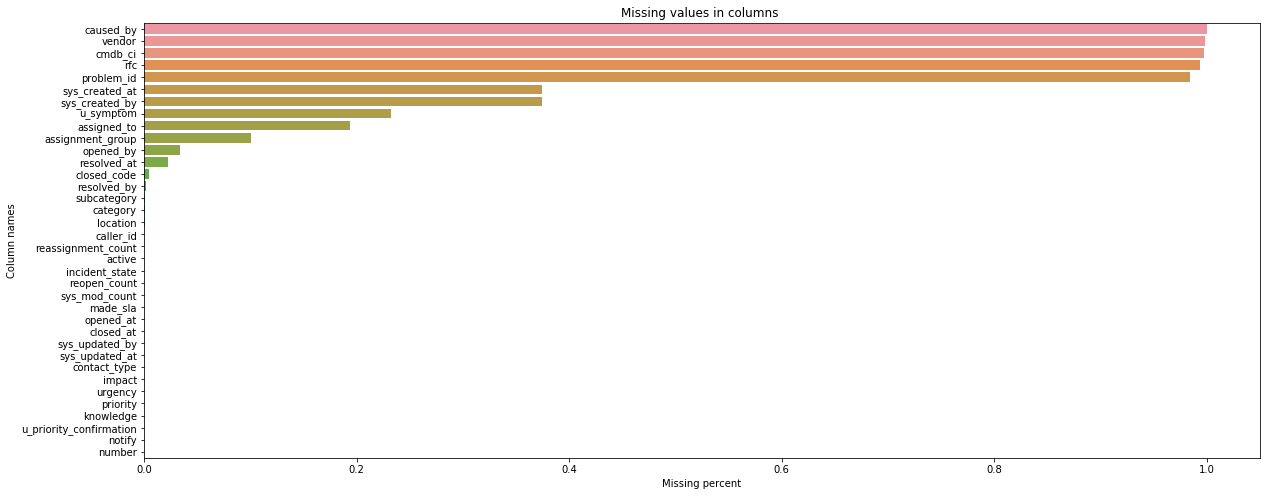

In [104]:
# Checking missing values visually
plt.figure(figsize=(20,8))
sns.barplot(missing_percent.values, missing_percent.index, orient="h")
plt.xlabel("Missing percent")
plt.ylabel("Column names")
plt.title("Missing values in columns ")
plt.show()

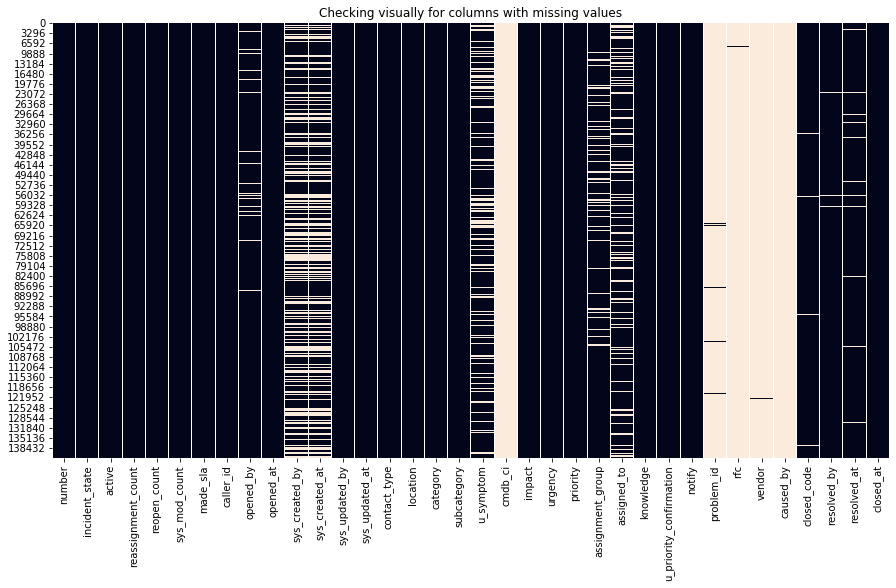

In [172]:
# checking missing data visually
plt.figure(figsize=(15,8))
sns.heatmap(data.isnull(), cbar=False)
plt.title("Checking visually for columns with missing values")
plt.show()

**Inference:**
    We can see features like `problem_id`, `rfc`, `vendor`, `caused_by` and `cmdb_ci` have more than 90% missing data so lets get rid of these features as there is no point imputing them.

In [168]:
#dropping columns which have more than 70% of data which is missing
data_new = data.drop(missing_percent[missing_percent>0.70].index, axis=1)



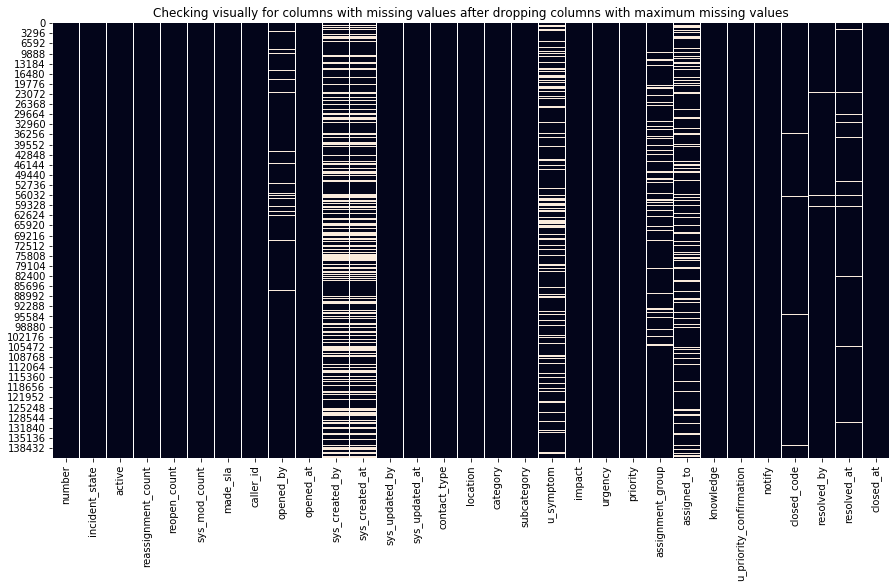

In [173]:
# checking missing data visually
plt.figure(figsize=(15,8))
sns.heatmap(data_new.isnull(), cbar=False)
plt.title("Checking visually for columns with missing values after dropping columns with maximum missing values")
plt.show()

## Data Types of columns:

In [174]:
#checking data_new types of all columns
feat_num = data_new.select_dtypes(np.number).columns.tolist()
feat_cat = data_new.select_dtypes('object').columns.tolist()

print(f"Numerical Features: {feat_num}\n")
print(f"Cateforical Features:\n {feat_cat}")

Numerical Features: ['reassignment_count', 'reopen_count', 'sys_mod_count']

Cateforical Features:
 ['number', 'incident_state', 'caller_id', 'opened_by', 'opened_at', 'sys_created_by', 'sys_created_at', 'sys_updated_by', 'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory', 'u_symptom', 'impact', 'urgency', 'priority', 'assignment_group', 'assigned_to', 'notify', 'closed_code', 'resolved_by', 'resolved_at', 'closed_at']


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,20,16,18,22,19,21,27,26,23,24,25
reassignment_count,69876,37104,15097,8274,4614,2595,1447,985,574,365,285,174,108,61,45,21,16,16,13,13,9,8,3,3,2,2,1,1


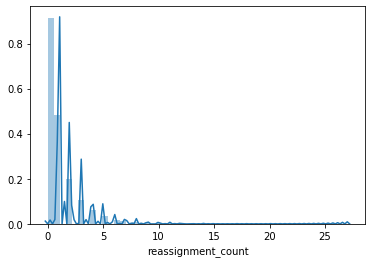

,0,1,2,3,4,5,6,7,8
index,0,1,2,3,4,5,6,7,8
reopen_count,139398,1918,190,107,48,24,18,5,4


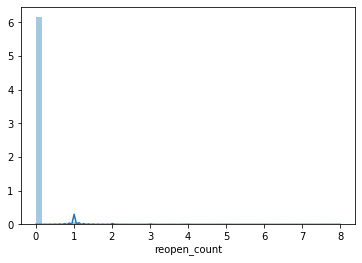

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114
index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,46,45,48,56,49,47,57,55,52,51,58,50,64,54,53,59,60,65,66,61,75,74,63,71,78,68,62,73,67,69,76,77,79,80,70,81,72,82,87,83,86,88,94,90,91,93,89,95,97,92,96,101,100,99,98,85,113,102,116,115,114,128,129,84,112,106,105,103,117,119
sys_mod_count,24913,22062,19749,14168,10735,8550,7014,5758,4678,3846,3115,2502,2075,1647,1359,1129,937,799,672,608,502,445,380,331,293,255,226,214,195,159,155,153,130,122,114,110,101,101,80,70,69,56,54,52,52,49,48,42,38,36,31,31,31,29,29,27,27,26,24,24,23,23,22,22,20,20,18,18,17,17,16,16,15,15,14,14,14,14,14,12,12,11,10,8,8,7,7,7,6,6,6,5,4,4,4,4,3,3,3,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1


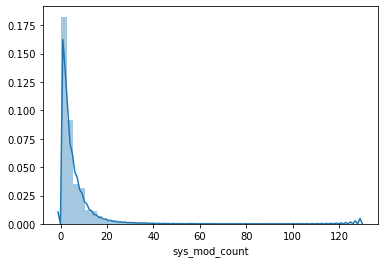

In [184]:
# checking distribution for all numerical features

for feat in feat_num:
    sns.distplot(data_new[feat])
    display(data_new[feat].value_counts().reset_index().T)
    plt.show()

In [196]:
# checking distribution of categorical features
print("Number of unique values in categorical columns:")
# getting number of unique values in all categorical features
data_new[feat_cat].nunique().sort_values(ascending=False)

Number of unique values in categorical columns:


sys_updated_at      50664
number              24918
opened_at           19849
resolved_at         18505
sys_created_at      11552
caller_id            5244
closed_at            2707
sys_updated_by        846
u_symptom             525
subcategory           254
assigned_to           234
location              224
resolved_by           216
opened_by             207
sys_created_by        185
assignment_group       78
category               58
closed_code            17
incident_state          9
contact_type            5
priority                4
urgency                 3
impact                  3
notify                  2
dtype: int64

In [207]:
# here we see a lot of columns which are actually dates but not categories

dates = ['sys_updated_at', 'opened_at', 'resolved_at', 'sys_created_at', 'closed_at']




# updating datatype of the date columns

for feat in dates:
    data_new[feat] = pd.to_datetime(data_new[feat])

# check their new datataype    
data_new[dates].dtypes

sys_updated_at    datetime64[ns]
opened_at         datetime64[ns]
resolved_at       datetime64[ns]
sys_created_at    datetime64[ns]
closed_at         datetime64[ns]
dtype: object

In [209]:
# remove the dates from categorical features
for date in dates:
    feat_cat.remove(date)

- we also saw `number` which seem to have a lot of unique values if we check it is actually the unique incident numbers in this column, so not really categorical in nature and might not be very useful to predict the targets. so lets remove this as well from the categorical features list.



In [211]:
feat_cat.remove('number')


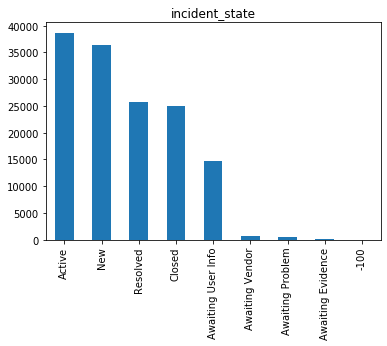

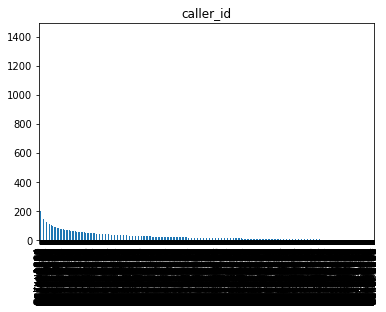

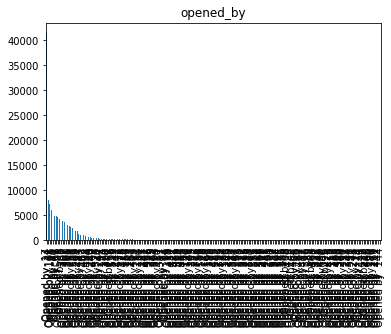

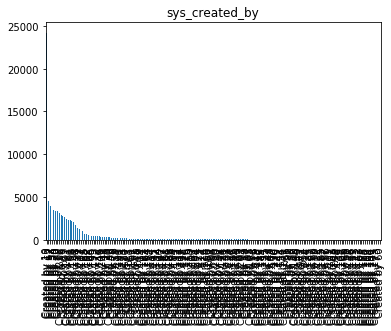

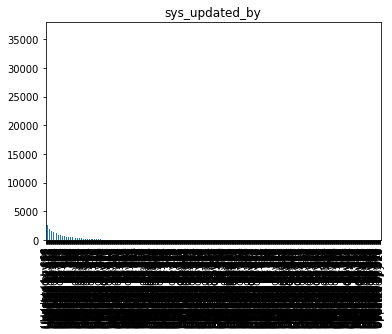

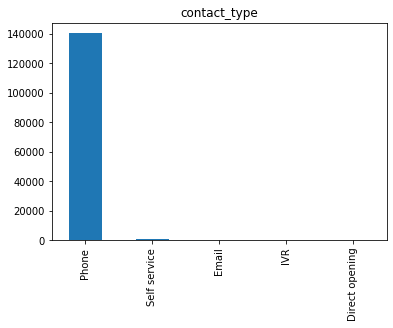

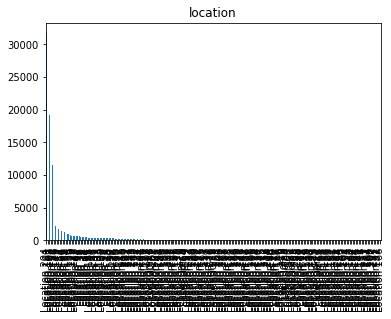

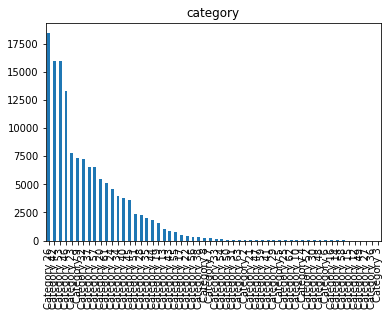

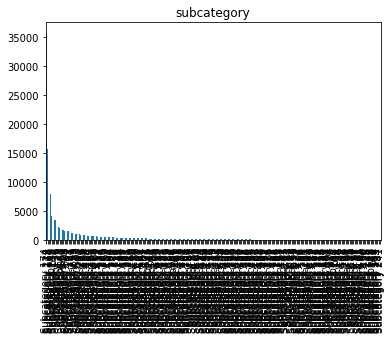

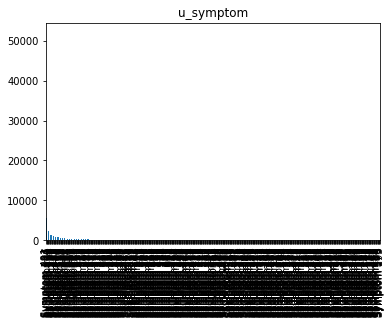

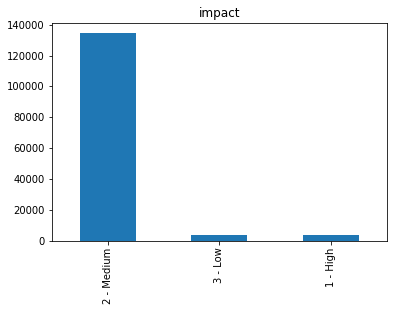

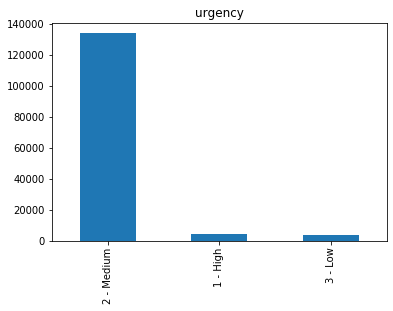

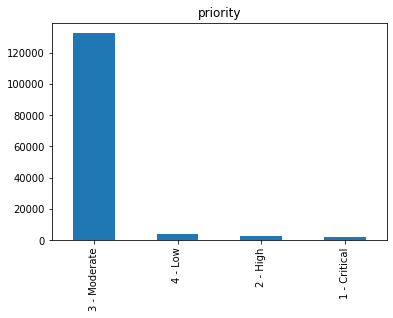

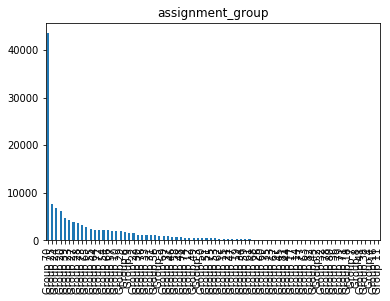

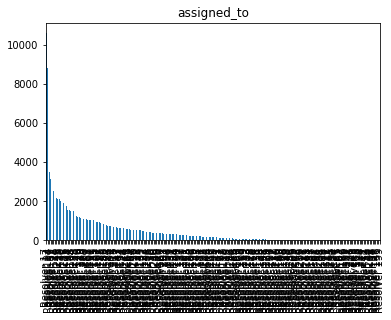

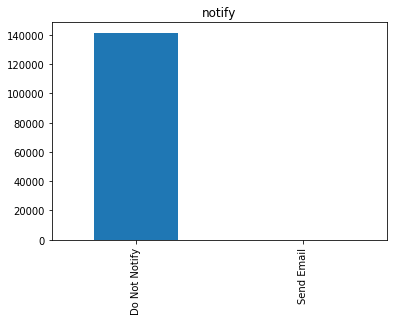

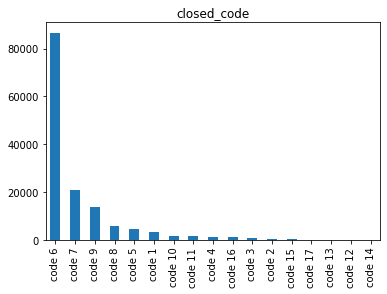

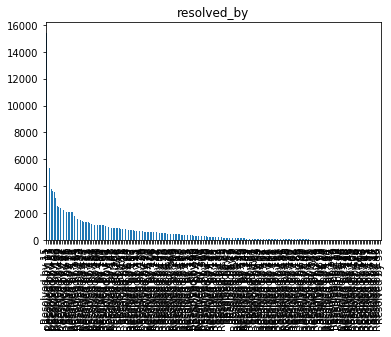

In [219]:
# lets check percentage of categories 

for feat in feat_cat:
    data_new[feat].value_counts().plot("bar", title=feat)
    plt.show()

In [220]:
# checking percentage of each category in that column
for feat in feat_cat:
    display(data_new[feat].value_counts(normalize=True))
    

Active                0.273202
New                   0.256908
Resolved              0.181714
Closed                0.176308
Awaiting User Info    0.103322
Awaiting Vendor       0.004989
Awaiting Problem      0.003253
Awaiting Evidence     0.000268
-100                  0.000035
Name: incident_state, dtype: float64

Caller 1904    0.010058
Caller 290     0.005583
Caller 4514    0.005054
Caller 1441    0.002273
Caller 298     0.002068
Caller 3763    0.001906
Caller 93      0.001687
Caller 1531    0.001630
Caller 4414    0.001581
Caller 3160    0.001553
Caller 2471    0.001546
Caller 90      0.001546
Caller 1270    0.001461
Caller 3479    0.001461
Caller 363     0.001440
Caller 3870    0.001419
Caller 1517    0.001397
Caller 707     0.001383
Caller 5093    0.001369
Caller 994     0.001348
Caller 4180    0.001320
Caller 156     0.001313
Caller 4808    0.001313
Caller 5317    0.001313
Caller 501     0.001306
Caller 2522    0.001306
Caller 3038    0.001299
Caller 2737    0.001299
Caller 742     0.001277
Caller 1325    0.001270
                 ...   
Caller 4022    0.000014
Caller 4941    0.000014
Caller 1360    0.000014
Caller 5339    0.000014
Caller 2356    0.000014
Caller 4626    0.000014
Caller 3647    0.000014
Caller 4247    0.000014
Caller 989     0.000014
Caller 1739    0.000014
Caller 4709    0

Opened by  17     0.302944
Opened by  24     0.058907
Opened by  131    0.053106
Opened by  108    0.044719
Opened by  55     0.041314
Opened by  40     0.035908
Opened by  62     0.035221
Opened by  59     0.034023
Opened by  501    0.030524
Opened by  8      0.030180
Opened by  386    0.027638
Opened by  397    0.026148
Opened by  301    0.024007
Opened by  390    0.021633
Opened by  305    0.021340
Opened by  180    0.019273
Opened by  58     0.017607
Opened by  221    0.015627
Opened by  500    0.014078
Opened by  239    0.013662
Opened by  94     0.008606
Opened by  443    0.007620
Opened by  47     0.007583
Opened by  463    0.007430
Opened by  402    0.005523
Opened by  468    0.004793
Opened by  444    0.004778
Opened by  20     0.004376
Opened by  240    0.003850
Opened by  460    0.003456
                    ...   
Opened by  159    0.000044
Opened by  318    0.000044
Opened by  166    0.000044
Opened by  406    0.000044
Opened by  313    0.000037
Opened by  389    0.000037
O

Created by 10     0.273286
Created by 13     0.050894
Created by 62     0.044485
Created by 52     0.040063
Created by 34     0.039126
Created by 20     0.037953
Created by 30     0.037761
Created by 89     0.035358
Created by 216    0.031985
Created by 6      0.030789
Created by 33     0.030304
Created by 171    0.027088
Created by 167    0.026107
Created by 81     0.025768
Created by 169    0.024268
Created by 129    0.023061
Created by 130    0.019416
Created by 98     0.014994
Created by 31     0.013685
Created by 217    0.013629
Created by 107    0.012049
Created by 25     0.007367
Created by 188    0.007119
Created by 192    0.006792
Created by 108    0.005618
Created by 45     0.005449
Created by 193    0.005427
Created by 199    0.005336
Created by 172    0.005156
Created by 12     0.004942
                    ...   
Created by 56     0.000068
Created by 115    0.000068
Created by 201    0.000068
Created by 181    0.000068
Created by 3      0.000068
Created by 49     0.000068
C

Updated by 908    0.255180
Updated by 44     0.089223
Updated by 60     0.049459
Updated by 429    0.029419
Updated by 859    0.018065
Updated by 135    0.016435
Updated by 131    0.015694
Updated by 265    0.015524
Updated by 241    0.013422
Updated by 573    0.013372
Updated by 133    0.013358
Updated by 213    0.013005
Updated by 129    0.012144
Updated by 467    0.011255
Updated by 915    0.011079
Updated by 21     0.010726
Updated by 214    0.010500
Updated by 578    0.010006
Updated by 340    0.009477
Updated by 833    0.009230
Updated by 332    0.009202
Updated by 723    0.008969
Updated by 874    0.008877
Updated by 307    0.008447
Updated by 88     0.008299
Updated by 533    0.008228
Updated by 974    0.008193
Updated by 748    0.007967
Updated by 928    0.007854
Updated by 746    0.007515
                    ...   
Updated by 274    0.000007
Updated by 959    0.000007
Updated by 836    0.000007
Updated by 593    0.000007
Updated by 730    0.000007
Updated by 426    0.000007
U

Phone             0.991179
Self service      0.007021
Email             0.001552
IVR               0.000127
Direct opening    0.000120
Name: contact_type, dtype: float64

Location 204    0.223743
Location 161    0.159599
Location 143    0.135876
Location 108    0.089123
Location 93     0.081575
Location 51     0.056596
Location 188    0.015123
Location 179    0.013944
Location 43     0.012341
Location 111    0.010802
Location 55     0.010358
Location 46     0.008833
Location 96     0.008494
Location 135    0.007724
Location 54     0.006425
Location 56     0.006404
Location 136    0.005196
Location 125    0.005147
Location 229    0.004893
Location 128    0.004723
Location 42     0.004702
Location 41     0.004448
Location 97     0.004392
Location 38     0.003926
Location 39     0.003693
Location 15     0.003502
Location 34     0.003438
Location 44     0.003325
Location 91     0.003008
Location 165    0.003001
                  ...   
Location 191    0.000042
Location 63     0.000035
Location 244    0.000035
Location 26     0.000035
Location 145    0.000035
Location 203    0.000035
Location 102    0.000035
Location 194    0.000028
Location 13     0.000028


Category 26    0.130287
Category 42    0.112805
Category 53    0.112741
Category 46    0.094073
Category 23    0.054923
Category 9     0.052000
Category 32    0.051351
Category 37    0.046486
Category 57    0.046119
Category 20    0.038875
Category 61    0.036488
Category 24    0.032203
Category 34    0.027861
Category 40    0.026547
Category 45    0.025552
Category 51    0.016874
Category 28    0.015928
Category 35    0.014382
Category 44    0.012695
Category 19    0.011240
Category 13    0.007018
Category 43    0.006058
Category 55    0.005655
Category 17    0.003615
Category 22    0.002965
Category 56    0.002273
Category 38    0.002048
Category 8     0.001864
Category 7     0.001462
Category 33    0.001130
Category 54    0.000981
Category 50    0.000657
Category 31    0.000650
Category 63    0.000551
Category 2     0.000544
Category 21    0.000487
Category 47    0.000353
Category 59    0.000297
Category 41    0.000254
Category 29    0.000226
Category 5     0.000219
Category 25    0

Subcategory 174    0.252717
Subcategory 223    0.110155
Subcategory 175    0.074124
Subcategory 164    0.055649
Subcategory 9      0.029124
Subcategory 275    0.025727
Subcategory 135    0.024484
Subcategory 170    0.023651
Subcategory 36     0.020600
Subcategory 75     0.014922
Subcategory 125    0.013750
Subcategory 3      0.012627
Subcategory 43     0.011822
Subcategory 150    0.011716
Subcategory 28     0.011052
Subcategory 303    0.011003
Subcategory 114    0.010918
Subcategory 103    0.010713
Subcategory 123    0.010063
Subcategory 154    0.008263
Subcategory 44     0.008114
Subcategory 251    0.007648
Subcategory 29     0.007083
Subcategory 31     0.006871
Subcategory 300    0.006568
Subcategory 163    0.006335
Subcategory 231    0.006052
Subcategory 200    0.005593
Subcategory 16     0.005452
Subcategory 185    0.005374
                     ...   
Subcategory 149    0.000042
Subcategory 22     0.000042
Subcategory 187    0.000042
Subcategory 280    0.000035
Subcategory 298    0

Symptom 491    0.478032
Symptom 534    0.051118
Symptom 387    0.023752
Symptom 4      0.023283
Symptom 116    0.022014
Symptom 532    0.019283
Symptom 571    0.016285
Symptom 494    0.012570
Symptom 296    0.012497
Symptom 506    0.011246
Symptom 10     0.010814
Symptom 208    0.010225
Symptom 470    0.009665
Symptom 118    0.009490
Symptom 120    0.008552
Symptom 102    0.008092
Symptom 458    0.007807
Symptom 87     0.007623
Symptom 54     0.006676
Symptom 105    0.006584
Symptom 6      0.006455
Symptom 127    0.005968
Symptom 517    0.005517
Symptom 117    0.005315
Symptom 70     0.005241
Symptom 592    0.005168
Symptom 119    0.005030
Symptom 295    0.004947
Symptom 455    0.004239
Symptom 462    0.003881
                 ...   
Symptom 125    0.000018
Symptom 243    0.000018
Symptom 590    0.000009
Symptom 599    0.000009
Symptom 415    0.000009
Symptom 61     0.000009
Symptom 229    0.000009
Symptom 184    0.000009
Symptom 441    0.000009
Symptom 103    0.000009
Symptom 578    0

2 - Medium    0.947944
3 - Low       0.027422
1 - High      0.024634
Name: impact, dtype: float64

2 - Medium    0.946243
1 - High      0.028367
3 - Low       0.025390
Name: urgency, dtype: float64

3 - Moderate    0.934656
4 - Low         0.028438
2 - High        0.020972
1 - Critical    0.015934
Name: priority, dtype: float64

Group 70    0.340975
Group 25    0.060228
Group 24    0.052957
Group 20    0.048393
Group 39    0.037083
Group 23    0.033161
Group 27    0.029937
Group 28    0.028534
Group 73    0.025914
Group 65    0.022369
Group 55    0.018824
Group 64    0.017608
Group 72    0.017412
Group 54    0.016957
Group 66    0.016620
Group 57    0.015890
Group 10    0.015765
Group 29    0.014918
Group 6     0.013475
Group 9     0.012910
Group 22    0.012110
Group 30    0.009396
Group 76    0.009129
Group 33    0.009059
Group 31    0.008855
Group 56    0.008439
Group 5     0.007828
Group 69    0.007522
Group 37    0.007451
Group 46    0.006337
              ...   
Group 68    0.001451
Group 26    0.001435
Group 60    0.001318
Group 35    0.001239
Group 13    0.001161
Group 67    0.000988
Group 45    0.000776
Group 81    0.000698
Group 44    0.000643
Group 17    0.000635
Group 14    0.000596
Group 77    0.000580
Group 63    0.000455
Group 82    0.000369
Group 43    0.000361
Group 2     0.000353
Group 32    0

Resolver 17     0.092719
Resolver 13     0.077065
Resolver 194    0.030775
Resolver 57     0.027527
Resolver 69     0.026117
Resolver 33     0.021906
Resolver 115    0.019516
Resolver 24     0.019034
Resolver 249    0.018631
Resolver 215    0.018491
Resolver 78     0.017660
Resolver 140    0.016950
Resolver 31     0.016801
Resolver 236    0.016101
Resolver 125    0.015252
Resolver 73     0.013650
Resolver 94     0.013343
Resolver 183    0.013229
Resolver 198    0.013098
Resolver 34     0.012932
Resolver 253    0.011259
Resolver 28     0.010935
Resolver 170    0.010646
Resolver 126    0.010611
Resolver 229    0.009902
Resolver 149    0.009710
Resolver 176    0.009648
Resolver 227    0.009596
Resolver 200    0.009403
Resolver 89     0.009272
                  ...   
Resolver 5      0.000053
Resolver 63     0.000053
Resolver 87     0.000053
Resolver 122    0.000053
Resolver 166    0.000053
Resolver 179    0.000053
Resolver 55     0.000044
Resolver 202    0.000044
Resolver 238    0.000044


Do Not Notify    0.99916
Send Email       0.00084
Name: notify, dtype: float64

code 6     0.614073
code 7     0.147045
code 9     0.096186
code 8     0.040043
code 5     0.031695
code 1     0.023156
code 10    0.011901
code 11    0.010589
code 4     0.008078
code 16    0.007738
code 3     0.004312
code 2     0.002475
code 15    0.001298
code 17    0.000816
code 13    0.000418
code 12    0.000092
code 14    0.000085
Name: closed_code, dtype: float64

Resolved by 15     0.108993
Resolved by 11     0.085167
Resolved by 103    0.037884
Resolved by 177    0.026936
Resolved by 53     0.025706
Resolved by 62     0.025147
Resolved by 133    0.021811
Resolved by 166    0.017974
Resolved by 180    0.017344
Resolved by 22     0.016510
Resolved by 32     0.016355
Resolved by 227    0.015712
Resolved by 196    0.015224
Resolved by 66     0.014793
Resolved by 71     0.014786
Resolved by 30     0.014758
Resolved by 215    0.014744
Resolved by 126    0.014645
Resolved by 113    0.012489
Resolved by 114    0.011266
Resolved by 85     0.010969
Resolved by 208    0.010390
Resolved by 33     0.010326
Resolved by 134    0.009775
Resolved by 27     0.009471
Resolved by 158    0.009457
Resolved by 231    0.009344
Resolved by 212    0.009245
Resolved by 153    0.008750
Resolved by 52     0.008206
                     ...   
Resolved by 230    0.000106
Resolved by 10     0.000106
Resolved by 18     0.000106
Resolved by 104    0.000092
Resolved by 94     0

In [225]:
# Checking if closed code can has any affect w.r.t incident_state
pd.crosstab(data_new['incident_state'], data_new['closed_code'])

closed_code,code 1,code 10,code 11,code 12,code 13,code 14,code 15,code 16,code 17,code 2,code 3,code 4,code 5,code 6,code 7,code 8,code 9
incident_state,,,,,,,,,,,,,,,,,
-100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0
Active,851,403,482,1,21,2,32,267,18,110,144,310,1388,24296,5597,1572,3013
Awaiting Evidence,0,0,0,0,0,0,0,0,0,0,0,1,0,30,1,2,4
Awaiting Problem,30,11,5,0,0,0,0,32,0,2,2,8,6,294,30,21,18
Awaiting User Info,662,143,98,4,8,0,10,125,18,24,70,227,425,8659,1742,829,1496
Awaiting Vendor,0,8,2,0,2,0,0,4,0,0,0,2,17,640,3,13,15
Closed,454,316,221,2,8,3,43,173,21,60,99,131,677,14923,4421,834,2492
New,800,467,454,4,12,4,54,310,36,88,189,306,1254,22366,4424,1510,3948
Resolved,468,330,231,2,8,3,44,180,22,65,104,154,702,15375,4510,865,2576


## Data Cleaning

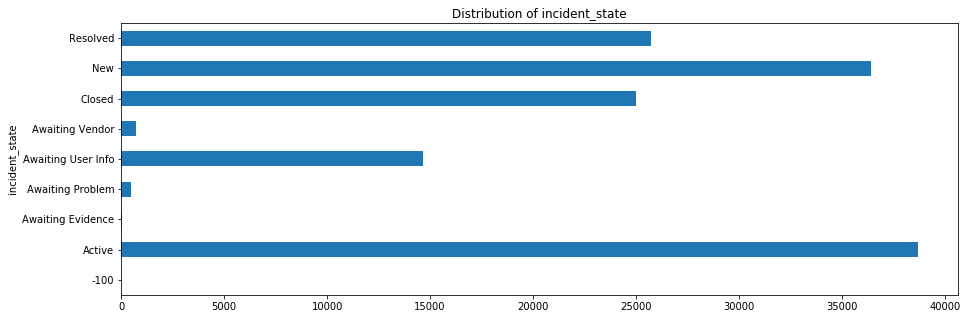

Active                38716
New                   36407
Resolved              25751
Closed                24985
Awaiting User Info    14642
Awaiting Vendor         707
Awaiting Problem        461
Awaiting Evidence        38
-100                      5
Name: incident_state, dtype: int64

In [126]:
# checking different incidents
data_new.groupby('incident_state') \
    .count()['number'] \
    .plot(kind='barh',
          title='Distribution of incident_state',
          figsize=(15, 5))
plt.show()
data_new['incident_state'].value_counts()

In [128]:
# if we check only those incidents whose status is closed
data_closed = data_new[data_new.incident_state=='Closed']

#hecking basic stats
data_closed.describe()

,reassignment_count,reopen_count,sys_mod_count
count,24985.000000,24985.000000,24985.000000
mean,0.941765,0.013368,6.694417
std,1.573962,0.149116,8.548757
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,2.000000
50%,0.000000,0.000000,4.000000
75%,1.000000,0.000000,8.000000
max,27.000000,8.000000,129.000000


In [129]:
# if we check only those incidents whose status is resolved
data_resolved = data_new[data_new.incident_state=='Resolved']

#hecking basic stats
data_resolved.describe()

,reassignment_count,reopen_count,sys_mod_count
count,25751.000000,25751.000000,25751.000000
mean,0.964545,0.019184,5.794027
std,1.602554,0.199273,8.663925
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,0.000000,0.000000,3.000000
75%,1.000000,0.000000,7.000000
max,27.000000,8.000000,128.000000


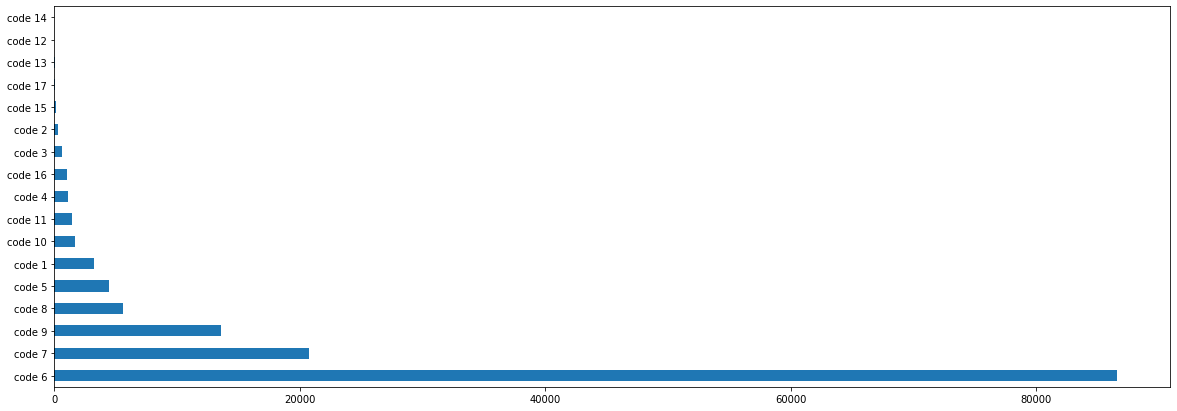

In [134]:
# Checking different types of closed codes
data_new.closed_code.value_counts().plot("barh", figsize=(20,7), title="")

**Inference:**
    `Code 6`, `Code 7` and `Code 9` seem to have the highest reasons as closed codes

In [136]:
# lets check what types of incidents were reopened
data_closed_reopen = data_closed[data_closed["reopen_count"]>0]



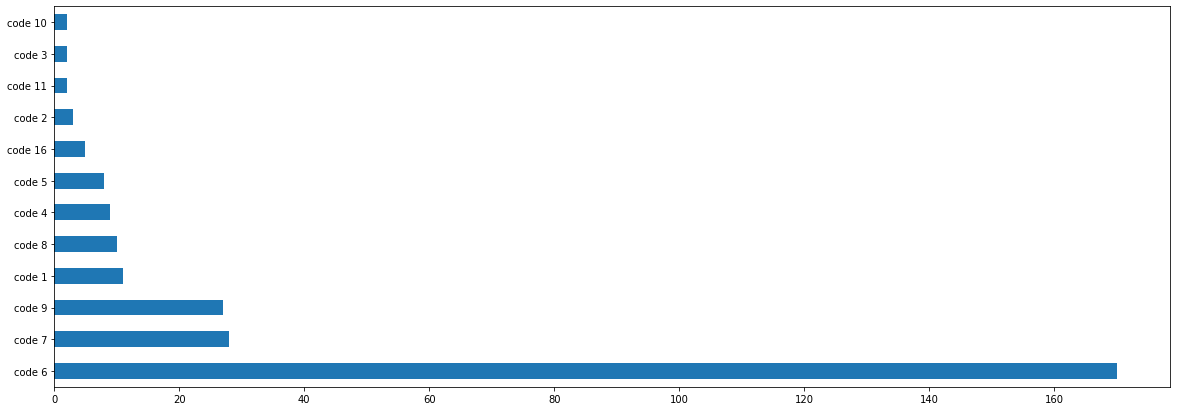

In [137]:
# checking closed codes for incidents which were reopened
# Checking different types of closed codes
data_closed_reopen.closed_code.value_counts().plot("barh", figsize=(20,7), title="")

**Inference:**
    We can see closed codes are similar but also few closed codes which were not used earlier now incidents go closed using these closed codes.

#### Checking what type of incidents are meeting SLA's


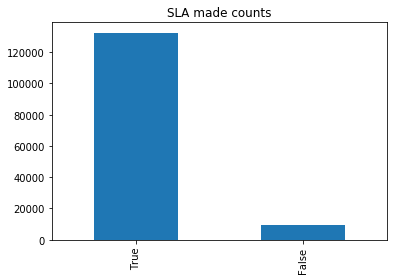

In [141]:
data_new.made_sla.value_counts().plot(kind='bar', title="SLA made counts")

In [146]:
# checking what closed tickets made SLA
data_closed_sla = data_closed[data_closed["made_sla"] == 1]
data_closed_reopen_sla = data_closed_reopen[data_closed["made_sla"] == 1]



In [144]:
pd.crosstab(data_closed['made_sla'],data_closed['priority'])


priority,1 - Critical,2 - High,3 - Moderate,4 - Low
made_sla,,,,
False,265,406,8358,125
True,6,2,15171,652


In [147]:
pd.crosstab(data_closed_reopen['made_sla'],data_closed_reopen['priority'])

priority,2 - High,3 - Moderate,4 - Low
made_sla,,,
False,5,204,1
True,0,67,1
